## Feature Importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rf

In [5]:
from sklearn.metrics import confusion_matrix as cm,classification_report as cr,accuracy_score as acs

In [6]:
df=pd.read_csv("emp_normalized.csv")

In [7]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
df.dtypes

Age                                  float64
Attrition                            float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsSinceLastPromotion              float64
BusinessTravel_Travel_Frequently     float64
BusinessTr

In [9]:
x=df.drop("Attrition",axis=1)
y=df['Attrition']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67)

## Random Forest Classifier

In [11]:
model1=rf().fit(x_train,y_train)
p=model1.predict(x_test)

In [12]:
print("Training Accuracy:",model1.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p))
print("------------------------------------------------------------")
print("classification_report:\n",cr(y_test,p))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.510906677651151
------------------------------------------------------------
confusion_matrix:
 [[29960 24768]
 [28663 25854]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.51      0.55      0.53     54728
         1.0       0.51      0.47      0.49     54517

    accuracy                           0.51    109245
   macro avg       0.51      0.51      0.51    109245
weighted avg       0.51      0.51      0.51    109245



## Light gbm

In [11]:
%%time

from lightgbm import LGBMClassifier

lgbm1 = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm1.fit(x_train, y_train)
y_pred1= lgbm1.predict(x_test)

Wall time: 37min 11s


In [12]:
print("Training Accuracy:",lgbm1.score(x_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,y_pred1))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,y_pred1))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,y_pred1))

Training Accuracy: 0.8573422796675332
-------------------------------------------------------------
Testing Accuracy: 0.683225776923429
-------------------------------------------------------------
confusion_matrix:
 [[37412 17316]
 [17290 37227]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.68      0.68      0.68     54728
         1.0       0.68      0.68      0.68     54517

    accuracy                           0.68    109245
   macro avg       0.68      0.68      0.68    109245
weighted avg       0.68      0.68      0.68    109245



In [19]:
model1.feature_importances_

array([0.05566356, 0.07176711, 0.06037981, 0.02836939, 0.02222865,
       0.06719563, 0.02400222, 0.02718548, 0.0231639 , 0.07265433,
       0.03741315, 0.0600569 , 0.02317252, 0.02303075, 0.02385483,
       0.05247999, 0.03084355, 0.02330507, 0.0440332 , 0.03593656,
       0.00944676, 0.00977886, 0.00790659, 0.00788205, 0.00749294,
       0.00784764, 0.00769019, 0.00727928, 0.00789081, 0.00759186,
       0.00800397, 0.00772063, 0.01123297, 0.00620489, 0.00616478,
       0.00617095, 0.00615174, 0.00637077, 0.00561321, 0.00617626,
       0.00622701, 0.00638121, 0.00972633, 0.00974975, 0.01056192])

In [20]:
df8=df.drop('Attrition',axis=1)
feature_names = list(df8.columns)

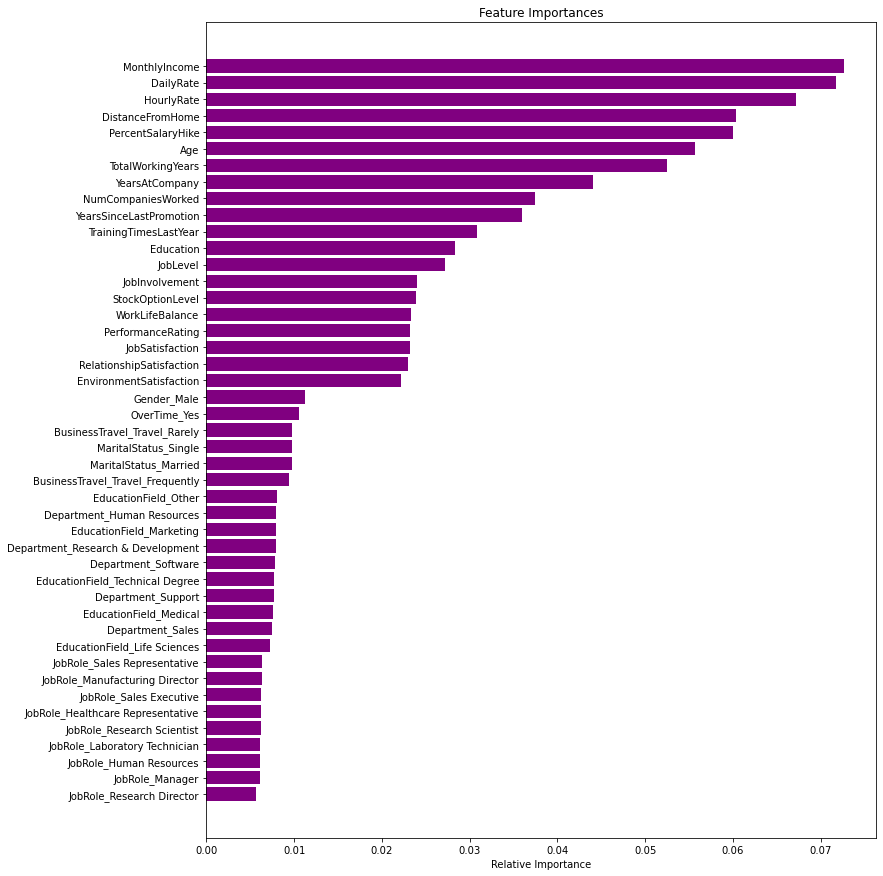

In [21]:
importances = model1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [22]:
columns1=(['Age','Attrition','DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'])

In [23]:
df2=pd.read_csv('emp_normalized.csv',usecols=columns1)
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615


In [24]:
x2=np.array(df2.drop("Attrition",axis=1))
y2=df2['Attrition']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,test_size=0.2)

## LogisticRegression

In [20]:
model2=lg().fit(X_train,Y_train)

p2=model2.predict(X_test)

In [21]:
print("Training Accuracy:",model2.score(X_train,Y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,p2))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,p2))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(Y_test,p2))

Training Accuracy: 0.5021122441507085
------------------------------------------------------------
Testing Accuracy: 0.49914412558927185
------------------------------------------------------------
confusion_matrix:
 [[25748 29035]
 [25681 28781]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.47      0.48     54783
         1.0       0.50      0.53      0.51     54462

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Decision tree

In [22]:
model3=dtc().fit(X_train,Y_train)
p3=model3.predict(X_test)

In [23]:
print("Training Accuracy:",model3.score(X_train,Y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,p3))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,p3))
print("------------------------------------------------------------")
print("classification_report:\n",cr(Y_test,p3))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.49835690420614215
------------------------------------------------------------
confusion_matrix:
 [[27389 27394]
 [27408 27054]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     54783
         1.0       0.50      0.50      0.50     54462

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Random Forest Classifier

In [25]:
model4=rf().fit(X_train,Y_train)
p4=model4.predict(X_test)

In [26]:
print("Training Accuracy:",model4.score(X_train,Y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,p4))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,p4))
print("------------------------------------------------------------")
print("classification_report:\n",cr(Y_test,p4))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.4895235479884663
------------------------------------------------------------
confusion_matrix:
 [[28871 25912]
 [29855 24607]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.49      0.53      0.51     54783
         1.0       0.49      0.45      0.47     54462

    accuracy                           0.49    109245
   macro avg       0.49      0.49      0.49    109245
weighted avg       0.49      0.49      0.49    109245



## Light gbm

In [65]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(X_train, Y_train)
y_pred = lgbm.predict(X_test)

Wall time: 41min 28s


In [66]:
print("Training Accuracy:",lgbm.score(X_train,Y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,y_pred))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,y_pred))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(Y_test,y_pred))

Training Accuracy: 0.7969728314598513
-------------------------------------------------------------
Testing Accuracy: 0.4969014600210536
-------------------------------------------------------------
confusion_matrix:
 [[27149 27774]
 [27187 27135]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.49      0.50     54923
         1.0       0.49      0.50      0.50     54322

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



### Feature Selection using SelectKBest

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(x,y)

In [31]:
dfscores = pd.DataFrame(fit.scores_) 
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
l=featureScores.nlargest(20,'Score')
l

,Specs,Score
27,EducationField_Life Sciences,2.839830
35,JobRole_Laboratory Technician,1.824628
21,BusinessTravel_Travel_Rarely,1.644823
20,BusinessTravel_Travel_Frequently,1.350161
34,JobRole_Human Resources,1.241292
29,EducationField_Medical,1.226695
36,JobRole_Manager,0.873949
38,JobRole_Research Director,0.829540
4,EnvironmentSatisfaction,0.760419
41,JobRole_Sales Representative,0.726482


In [32]:
col=(['Attrition','EducationField_Life Sciences','JobRole_Laboratory Technician','BusinessTravel_Travel_Rarely',
'BusinessTravel_Travel_Frequently','JobRole_Human Resources','EducationField_Medical','JobRole_Manager','JobRole_Research Director',
'EnvironmentSatisfaction','JobRole_Sales Representative','RelationshipSatisfaction','Department_Support','EducationField_Technical Degree',
 'Department_Research & Development']) 

In [33]:
df3=pd.read_csv("emp_normalized.csv",usecols=col)

In [34]:
df3

,Attrition,EnvironmentSatisfaction,RelationshipSatisfaction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Support,EducationField_Life Sciences,EducationField_Medical,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Research Director,JobRole_Sales Representative
0,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.666667,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.666667,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546217,1.0,0.666667,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546218,0.0,1.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546219,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
x1=df3.drop("Attrition",axis=1)
y1=df3["Attrition"]

In [36]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

In [37]:
len(y1_train[y1_train==1])

218215

In [38]:
len(y1_train[y1_train==0])

218761

## LogisticRegression

In [39]:
logis=lg().fit(x1_train,y1_train)

p5=logis.predict(x1_test)

In [40]:
print("Training Accuracy:",logis.score(x1_train,y1_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,p5))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,p5))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y1_test,p5))

Training Accuracy: 0.5027964922558676
------------------------------------------------------------
Testing Accuracy: 0.49915327932628495
------------------------------------------------------------
confusion_matrix:
 [[30297 24131]
 [30584 24233]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.56      0.53     54428
         1.0       0.50      0.44      0.47     54817

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Decision tree

In [41]:
tree=dtc().fit(x1_train,y1_train)
p6=tree.predict(x1_test)

In [42]:
print("Training Accuracy:",tree.score(x1_train,y1_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,p6))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,p6))
print("------------------------------------------------------------")
print("classification_report:\n",cr(y1_test,p6))

Training Accuracy: 0.5290656695104536
------------------------------------------------------------
Testing Accuracy: 0.5002151128198087
------------------------------------------------------------
confusion_matrix:
 [[28339 26089]
 [28510 26307]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     54428
         1.0       0.50      0.48      0.49     54817

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Random Forest Classifier

In [43]:
forest=rf().fit(x1_train,y1_train)
p7=forest.predict(x1_test)

In [44]:
print("Training Accuracy:",forest.score(x1_train,y1_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,p7))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,p7))
print("------------------------------------------------------------")
print("classification_report:\n",cr(y1_test,p7))

Training Accuracy: 0.5289512467503936
------------------------------------------------------------
Testing Accuracy: 0.5003432651379925
------------------------------------------------------------
confusion_matrix:
 [[27261 27167]
 [27418 27399]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     54428
         1.0       0.50      0.50      0.50     54817

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Light gbm

In [45]:
%%time

from lightgbm import LGBMClassifier

lgbm2 = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm2.fit(x1_train, y1_train)
y_pred1 = lgbm2.predict(x1_test)

Wall time: 12min 59s


In [46]:
print("Training Accuracy:",lgbm2.score(x1_train,y1_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,y_pred1))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,y_pred1))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(y1_test,y_pred1))

Training Accuracy: 0.5148223243381788
-------------------------------------------------------------
Testing Accuracy: 0.4978168337223672
-------------------------------------------------------------
confusion_matrix:
 [[28116 26312]
 [28549 26268]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     54428
         1.0       0.50      0.48      0.49     54817

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245

